In [1]:
# onedrive = r"C:\Users\Mike.Kryajak\OneDrive"
onedrive = r"C:\Users\mikek\OneDrive"
# %matplotlib ipympl
# %matplotlib qt
# %matplotlib widget
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
import scipy
import re
import netCDF4 as nc
import matplotlib as mpl

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\gridtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))


# from gridtools.hypnotoad_tools import *
from gridtools.b2_tools import *
from gridtools.utils import *

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.viewer_2d import *
from code_comparison.code_comparison import *
from code_comparison.solps_pp import *


%load_ext autoreload
%autoreload 2

%matplotlib inline
print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


# IO

In [52]:
balance_paths = {
    "seed_1" : r"C:\Users\mikek\OneDrive\Project\DLS\from_omkar\seeding\seed_1", 
}

store_slc = {}

for case in balance_paths:
    print(case)
    if "balance.nc" in os.listdir(balance_paths[case]):
        store_slc[case] = SOLPScase(balance_paths[case])
        store_slc[case].get_impurity_stats("N", all_states = True)
        store_slc[case].get_impurity_stats("C", all_states = True)
    else:
        print(f"Skipping {case} as no balance.nc file found")

seed_1
Warning, hy not found in balance file
Saving all states
Added total radiation, density and fraction for N
Saving all states
Added total radiation, density and fraction for C


In [5]:
%matplotlib widget

# Check poloidal indices

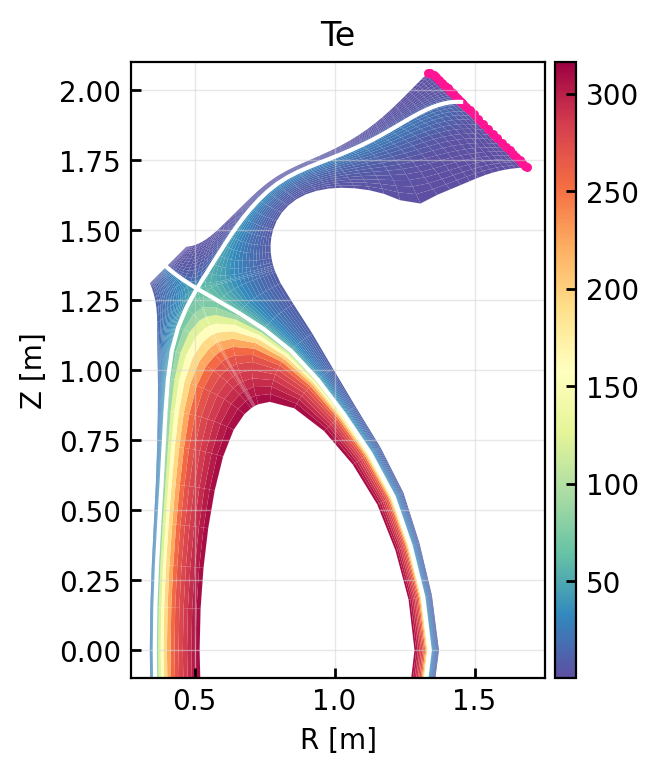

In [26]:
fig, ax = plt.subplots(dpi = 200)

self = store_slc["seed_1"]
self.plot_2d("Te", ax = ax)
ax.set_ylim(-2.1, 0.1) ## LOWER
ax.set_ylim(-0.1, 2.1) ## UPPER

psel = self.psel
pind = psel["outer_upper_target_guard"]
R = self.g["R"]
Z = self.g["Z"]
ax.scatter(R[pind, :], Z[pind, :], color = "deeppink", s = 5)

# Check X-point on field line

In [37]:
self.psel["outer_lower_xpoint_fromtarget"]

-111

In [90]:
df

,R,Z,Spol,Spar,apar,Xpoint
0,1.329751,0.000000,0.000000,0.000000,0.003480,NaN
1,1.329751,-0.095091,0.095794,0.177494,0.003480,NaN
2,1.295461,-0.282128,0.285209,0.530616,0.003411,NaN
3,1.242647,-0.461267,0.469699,0.897709,0.003362,NaN
4,1.170640,-0.626558,0.646953,1.284860,0.003252,NaN
5,1.081985,-0.774231,0.814607,1.696395,0.003099,NaN
6,0.988486,-0.906002,0.970211,2.163890,0.002972,NaN
7,0.894037,-1.020255,1.111433,2.739376,0.002787,NaN
8,0.798393,-1.111971,1.235864,3.477144,0.002547,NaN
9,0.707505,-1.181705,1.340732,4.449691,0.002328,NaN


In [116]:
fline[fline["Xpoint"] == "after"]

,R,Z,Spol,Spar,apar,Xpoint
12,0.446148,-1.240151,0.145751,6.049629,0.000402,after


seed_1
Warning, hy not found in balance file


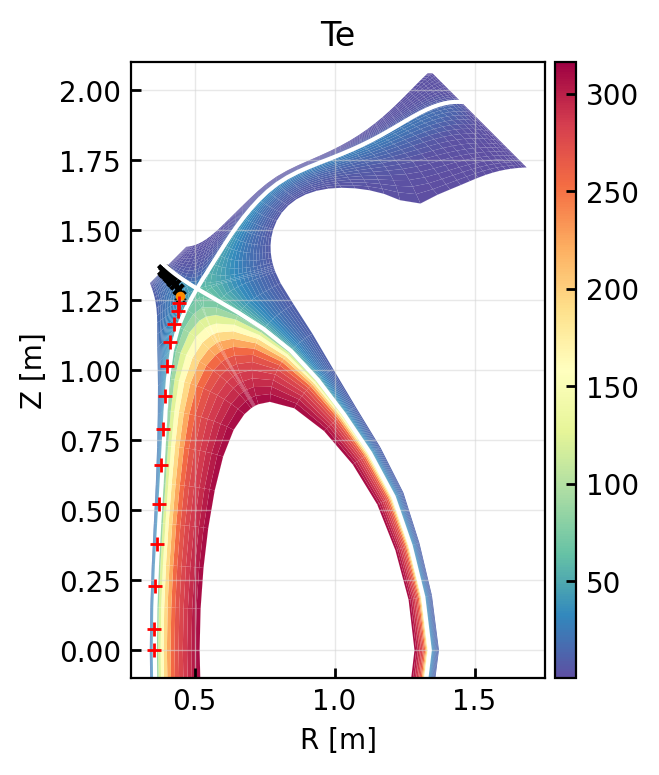

In [143]:
balance_paths = {
    "seed_1" : r"C:\Users\mikek\OneDrive\Project\DLS\from_omkar\seeding\seed_1", 
}

store_slc = {}

for case in balance_paths:
    print(case)
    if "balance.nc" in os.listdir(balance_paths[case]):
        store_slc[case] = SOLPScase(balance_paths[case])
        # store_slc[case].get_impurity_stats("N", all_states = True)
        # store_slc[case].get_impurity_stats("C", all_states = True)
    else:
        print(f"Skipping {case} as no balance.nc file found")

fig, ax = plt.subplots(dpi = 200)

self = store_slc["seed_1"]
self.plot_2d("Te", ax = ax, grid_only = False)
# ax.set_ylim(-2.1, 0.1) ## LOWER
ax.set_ylim(-0.1, 2.1) ## UPPER

region = "inner_upper"
fline = self.get_1d_poloidal_data(["R", "Z"], sepadd = 4, region = region, target_first = False)
fline_upstream = fline.query("region == 'upstream'").squeeze()
fline_divertor = fline.query("region == 'divertor'").squeeze()
fline_x = fline.query("Xpoint == 1").squeeze()

# fline_x_before = fline.query("Xpoint == 'before'").squeeze()
# fline_x_after = fline.query("Xpoint == 'after'").squeeze()
# fline_sol = fline.iloc[:fline_x.name]

# ax.scatter(fline["R"], fline["Z"], s = 5, c = "deeppink")
# ax.scatter(fline_upstream["R"], fline_upstream["Z"], s = 9, marker = "+", c = "black")
ax.plot(fline_upstream["R"], fline_upstream["Z"], ms = 5, lw = 0, markeredgewidth = 1,  marker = "+", c = "red")
ax.scatter(fline_divertor["R"], fline_divertor["Z"], s = 12, marker = "x", c = "k")
ax.scatter(fline_x["R"], fline_x["Z"], s = 6, marker = "o", facecolor = "None", c = "darkorange")

In [128]:
fline_sol

,R,Z,Spol,Spar,apar,region
